In [52]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


In [55]:
data = pd.read_csv("/Users/ks/Downloads/Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<Figure size 576x432 with 0 Axes>

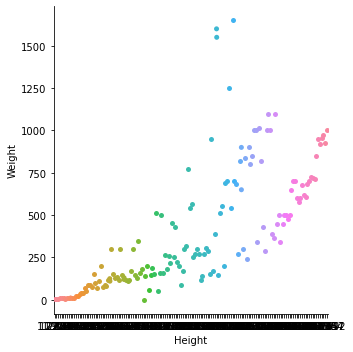

In [56]:
plt.figure(figsize=(8,6))
sns.catplot(x="Height",y="Weight",data=data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8658b51e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f86df87b850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8658b51af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f86df8744f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8658b54190>],
 'means': []}

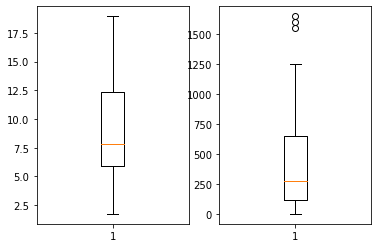

In [57]:
plt.subplot(1,2,1)
plt.boxplot(data.Height)
plt.subplot(1,2,2)
plt.boxplot(data.Weight)

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

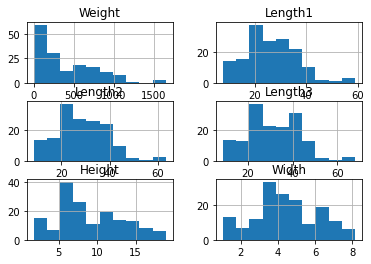

In [58]:
data.hist()

<AxesSubplot:xlabel='Species', ylabel='count'>

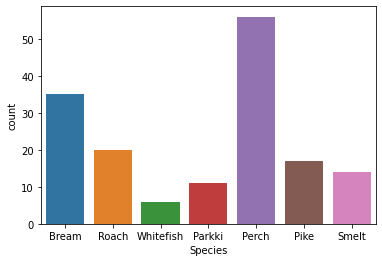

In [59]:
sns.countplot(x="Species",data=data)

<Figure size 576x432 with 0 Axes>

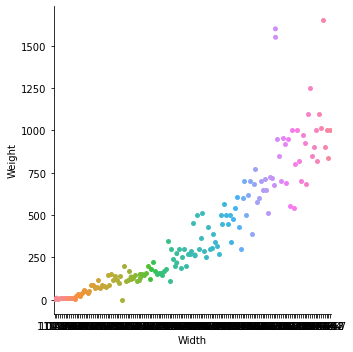

In [60]:
plt.figure(figsize=(8,6))
sns.catplot(x="Width",y="Weight",data=data)

<Figure size 576x432 with 0 Axes>

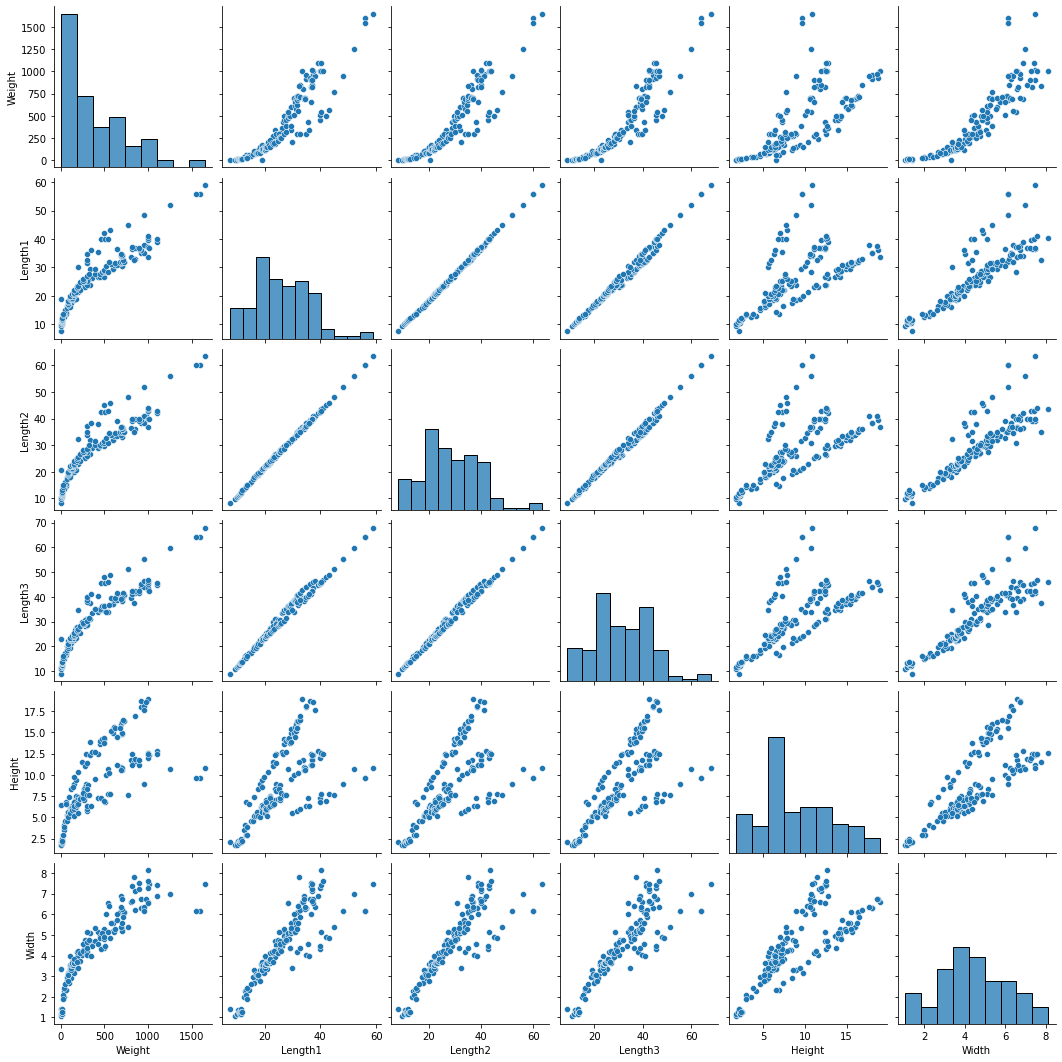

In [61]:
plt.figure(figsize=(8,6))
sns.pairplot(data)

In [62]:
train = data.iloc[0:,2:]
test = data.iloc[0:,1]
train.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [80]:
trainx,testx,trainy,testy= train_test_split(train,test,test_size = 0.2)

In [81]:
model=LinearRegression().fit(trainx,trainy)

In [82]:
model.score(testx,testy)

0.8817006097742482

In [89]:
model1=PolynomialFeatures(2).fit(trainx)

In [94]:
k=model1.transform(trainx)
k=pd.DataFrame(k)

In [95]:
model2=PolynomialFeatures(2).fit(testx)

In [96]:
s=model2.transform(testx)
s=pd.DataFrame(s)

In [100]:
model3=LinearRegression().fit(k,trainy)

In [102]:
model3.score(s,testy)

0.9806880098949597

In [111]:
from sklearn.model_selection import KFold
model4=KFold(n_splits=5).get_n_splits(trainx,trainy)

In [113]:
from sklearn.model_selection import cross_val_score
cross_val_score(model3,testx,testy)

array([0.6453434 , 0.88189722, 0.88276327, 0.86772697, 0.93781094])